<a href="https://colab.research.google.com/github/Mohak91/Course-on-comparative-genomics-of-bacteria/blob/main/Optional_extended_discussion_on_shannon_entropy_cross_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We did not discuss aspects of these in the class, so follow this notebook only if you are interested in additional aspects related to shannon-entropy related analysis. (not a part of the syllabus)

This notebook talks about two things:
a. Finding if the regions (positions) with low shannon entropies as compared to three standard deviations below the average entropy value of the genome are statistically significant, given the base composition of the genome.

b. Cross entropy: helps compare the difference in the entropy values of expected distribution with the observed distribution. For example, your expectation is that each window should have 0.25 base frequency of all nucleotides. But you find that the frequencies are actually 0.15, 0.15, 0.35, 0.35 for a given window. How much are they different from the expected frequencies? The more different they are, the higher the cross entropy.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/comp_gen_bacteria_krea

/content/drive/MyDrive/comp_gen_bacteria_krea


In [ ]:
import math
import numpy as np

fname = "/content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.fna"
w = 10 # window size

# start of readUserGenomeSeq #######
def readUserGenomeSeq(fname):
    fh = open(fname, 'r')
    fh.readline() # remove fasta header
    seq = ""
    for line in fh:
        seq = seq+line.rstrip("\n")
    fh.close()
    return seq
# end of readUserGenomeSeq #######

def shannonE( seqarr ):
    basecount = {"A":1, "T":1, "C":1, "G":1} # pseudocount of 1 so that natural log is not 0 if a base is not encountered
    for base in seqarr: # get base counts
        basecount[base] += 1

    total = float(sum(basecount.values()))
    basefrac = [basecount[nt]/total for nt in basecount]
    SE = 0.0 # shannon's entropy
    for bf in basefrac:
        SE += bf * math.log(bf,4) # this is log 4, thus entropy is in range 0-1 for alphabet of size 4.
    SE = -1.0 * SE
    return SE

def crossE( seqarr, true_probability_dictionary ):
    basecount = {"A":1, "T":1, "C":1, "G":1} # pseudocount of 1 so that natural log is not 0 if a base is not encountered
    for base in seqarr: # get base counts
        basecount[base] += 1

    total = float(sum(basecount.values()))
    basefrac_dict = { nt:count/total for (nt,count) in basecount.items()} 
    #basefrac = [basecount[nt]/total for nt in basecount]
    CE = 0.0 # shannon's entropy
    for nt,bf in basefrac_dict.items():
        CE += true_probability_dictionary[nt] * math.log(bf,4) # this is log 4, thus entropy is in range 0-1 for alphabet of size 4.
    CE = -1.0 * CE
    return CE

def global_nt_freq(refseqarr):
  a_freq=refseqarr.count("A")/len(refseqarr)
  t_freq=refseqarr.count("T")/len(refseqarr)
  g_freq=refseqarr.count("G")/len(refseqarr)
  c_freq=refseqarr.count("C")/len(refseqarr)
  print(a_freq,t_freq,g_freq,c_freq)
  return a_freq,t_freq,g_freq,c_freq

In [ ]:
def global_nt_freq(refseqarr):
  a_freq=refseqarr.count("A")/len(refseqarr)
  t_freq=refseqarr.count("T")/len(refseqarr)
  g_freq=refseqarr.count("G")/len(refseqarr)
  c_freq=refseqarr.count("C")/len(refseqarr)
  print(a_freq,t_freq,g_freq,c_freq)
  return a_freq,t_freq,g_freq,c_freq

0.3457202159717003 0.3373885490866714 0.159127424682283 0.15776381025934533


In [ ]:
refseq = readUserGenomeSeq(fname)
refseqarr = list(refseq)
print ("Genome length: ", len(refseqarr))

refseqSE = [] # shannon entropy for all windows
refseqCE_eq = []
refseqCE_global = []
true_probability_dictionary_eq={'A':0.25,'T':0.25,'G':0.25,'C':0.25}
a_freq,t_freq,g_freq,c_freq=global_nt_freq(refseqarr)
true_probability_dictionary_global={"A":a_freq, "T":t_freq, "G":g_freq,"C":c_freq}

#overlapping windows
#non-overlapping windows
for i in range(0,len(refseqarr)-w+1): # from beginning of seq till the pos where the window of size w will exist
  wstart = max(0,i-w) # window start #first iteration: 0 ...... 1
  wend = min(len(refseqarr),i+w+1) # window end #11 (0+10+1) ...... 11+10+1 = 22
  seqregion = refseqarr[wstart:wend] # get seq region from i-w to i+w
  #print(i,wstart,wend)
  #if i>10:
  #if i>(len(refseqarr)-w+2)-10:
    #print(i,wstart,wend)
    #break
  refseqSE.append(shannonE(seqregion))
  refseqCE_eq.append(crossE(seqregion, true_probability_dictionary_eq))
  refseqCE_global.append(crossE(seqregion, true_probability_dictionary_global))

Genome length:  580076


In [ ]:
window_list=[]
for i in range(len(refseqSE)):
  window_list.append(i+1)

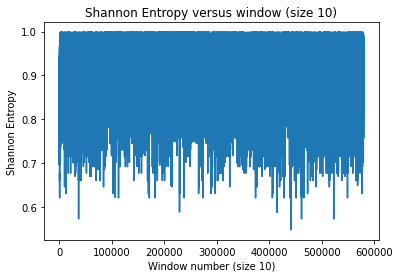

In [ ]:
import matplotlib.pyplot as plt
  
plt.plot(window_list, refseqSE)
plt.title('Shannon Entropy versus window (size 10)')
plt.xlabel('Window number (size 10)')
plt.ylabel('Shannon Entropy')
plt.show()

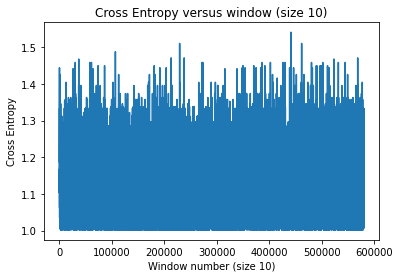

In [ ]:
import matplotlib.pyplot as plt
  
plt.plot(window_list, refseqCE_eq)
plt.title('Cross Entropy versus window (size 10)')
plt.xlabel('Window number (size 10)')
plt.ylabel('Cross Entropy')
plt.show()

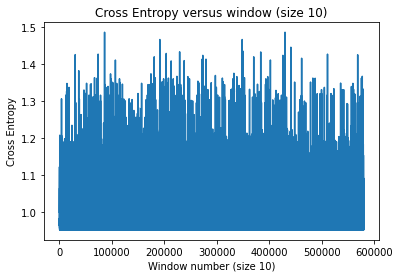

In [ ]:
import matplotlib.pyplot as plt
  
plt.plot(window_list, refseqCE_global)
plt.title('Cross Entropy versus window (size 10)')
plt.xlabel('Window number (size 10)')
plt.ylabel('Cross Entropy')
plt.show()

In [ ]:
genome_entropy = shannonE(refseqarr)

In [ ]:
genome_entropy

0.9504462806822842

In [ ]:
print(shannonE(['T','T','T','T','T','T','T','T','T','T','T','T','T','T','T','T','T','T','T','T']))

0.3708423778948705


In [ ]:
refseqSE_deviation = [pointrefseqSE - genome_entropy for pointrefseqSE in refseqSE]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb8335f750>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb7fc86210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb8335f1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb7fc86cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb7fc8b250>],
 'means': []}

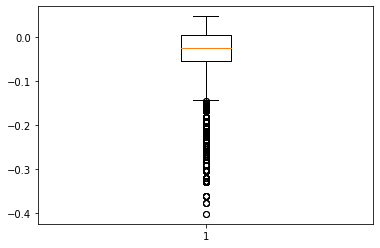

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(refseqSE_deviation)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


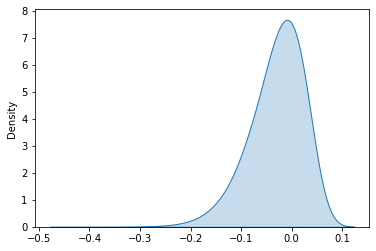

In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
 
#data = np.random.normal(10,3,300) #Generating data.
#plt.figure(figsize = (5,5))
sb.kdeplot(refseqSE_deviation , bw = 0.5, fill = True)
plt.show()

In [ ]:
#POTENTIAL LOW COMPLEXITY REGIONS

SEarr = np.array(refseqSE)
avgSE = np.mean(SEarr)
stdSE = np.std(SEarr)
factorSE = 3*stdSE
factorSE_list=[]
factorSE_list_window=[]
for i in range(len(refseqSE)):
  if refseqSE[i] < avgSE-factorSE: # if LC and SE score are 2*SD below their respective means => Low complexity
    factorSE_list.append(refseqSE[i])
    factorSE_list_window.append(i+1)

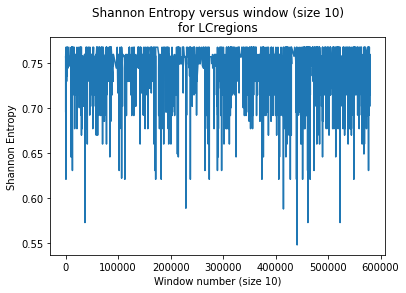

In [ ]:
import matplotlib.pyplot as plt
  
plt.plot(factorSE_list_window, factorSE_list)
plt.title('Shannon Entropy versus window (size 10)\nfor LCregions')
plt.xlabel('Window number (size 10)')
plt.ylabel('Shannon Entropy')
plt.show()

In [ ]:
len(factorSE_list)

6562

In [ ]:
len(window_list)

580067

In [ ]:
import random
import statistics
random_refseqarr = list(refseq)
rfactorSE_list_overall=[] #the number of motifs that i find after every iteration of the random shuffling
for i in range(0,100):
  random.shuffle(random_refseqarr) #in-place shuffling
  random_refseqSE=[]
  for i in range(0,len(random_refseqarr)-w+1): # from beginning of seq till the pos where the window of size w will exist
    wstart = max(0,i-w) # window start
    wend = min(len(random_refseqarr),i+w+1) # window end
    seqregion = random_refseqarr[wstart:wend] # get seq region from i-w to i+w
    random_refseqSE.append(shannonE(seqregion))
  rSEarr = np.array(random_refseqSE)
  ravgSE = np.mean(rSEarr)
  rstdSE = np.std(rSEarr)
  rfactorSE = 3*rstdSE
  rfactorSE_list=[]
  rfactorSE_list_window=[]
  for i in range(len(random_refseqSE)):
    if random_refseqSE[i] < ravgSE-rfactorSE: # if LC and SE score are 2*SD below their respective means => Low complexity
      rfactorSE_list.append(random_refseqSE[i])
      rfactorSE_list_window.append(i+1)
  rfactorSE_list_overall.append(len(rfactorSE_list))

In [ ]:
statistics.mean(rfactorSE_list_overall)

6238.1

In [ ]:
statistics.stdev(rfactorSE_list_overall)

192.32603315802837

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


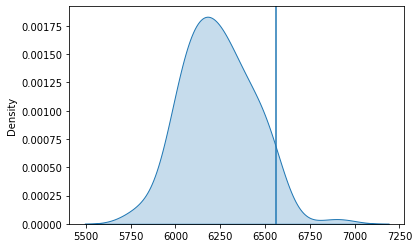

In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
 
#data = np.random.normal(10,3,300) #Generating data.
#plt.figure(figsize = (5,5))
sb.kdeplot(rfactorSE_list_overall , bw = 0.5, fill = True)
plt.axvline(6562)
plt.show()

count_gt_observed=0
for se in rfactorSE_list_overall:
  #print(se)
  if se > 6562:
    count_gt_observed+=1

pvalue=count_gt_observed/len(rfactorSE_list_overall)

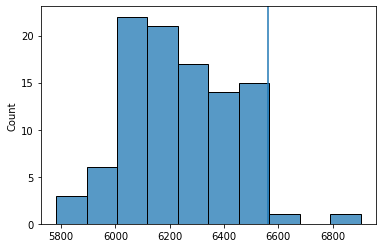

In [ ]:
sb.histplot(rfactorSE_list_overall,fill = True)
plt.axvline(6562)
plt.show()

In [ ]:
print(pvalue)

0.02
